In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

Let us define some data as a simple dictionary and then convert it to a pandas dataframe

In [2]:
data_dict = { 
	'run1': [360, 0.91, 20.1],
	'run2': [305, 0.98, 22.0]
}

We can very trivially convert this to a pandas dataframe.  We can also pass lables via "index", to tell us what each of the entries means and allow us to more easily search.

In [3]:
data_frame = pd.DataFrame(data_dict, index=['T', 'S2', 'angle'])

We can easily output this as a nice table

In [4]:
data_frame

,run1,run2
T,360.00,305.00
S2,0.91,0.98
angle,20.10,22.00


If we use the print function it is basically the same, just not quite as nice looking. 

In [5]:
print(data_frame)

         run1    run2
T      360.00  305.00
S2       0.91    0.98
angle   20.10   22.00


Let's look at how to extract info.  To get info for a single entry in the dict, can easily just use the name as an index.

In [6]:
data_frame['run1']

T        360.00
S2         0.91
angle     20.10
Name: run1, dtype: float64

To get the Temperature info from each of the runs, we access the data a little bit differently, using the "loc" command.

In [7]:
data_frame.loc['T']

run1    360.0
run2    305.0
Name: T, dtype: float64

These two can be combined to access, e.g., the temperature of run1.

In [8]:
data_frame['run1'].loc['T']

360.0

Alternatively, since T is the first entry, can access it just using an integer index of 0, or pass the index label (since we defined one):

In [9]:
data_frame['run1'][0]

360.0

In [10]:
data_frame['run1']['T']

360.0

It is easy to write dataframes to CSV files (and read them).  

In [11]:
data_frame.to_csv(r'test_data.csv', index=True)

In [12]:
data_frame_from_csv = pd.read_csv('test_data.csv',index_col=0)

In [13]:
data_frame_from_csv

,run1,run2
T,360.00,305.00
S2,0.91,0.98
angle,20.10,22.00


Let's now read in some real data as a CSV file.  This is the number of positive and negative COVID-19 cases in the state of oregon per day from https://projects.oregonlive.com/coronavirus/

In [14]:
oregon_data = pd.read_csv('data-1C2pE-8.csv')

In [107]:
oregon_data

,updated,positive,negative
0,2020-02-29 00:00:00,1,3
1,2020-03-03 17:40:00,3,29
2,2020-03-04 17:25:00,3,45
3,2020-03-06 09:30:00,3,64
4,2020-03-07 10:00:00,7,77
5,2020-03-08 10:00:00,14,100
6,2020-03-09 10:00:00,14,165
7,2020-03-10 10:00:00,15,213
8,2020-03-11 10:00:00,21,286
9,2020-03-12 10:00:00,30,317


You can see by the way this has been imported, the dictionary keys are 'updated', 'positive', and 'negative', so we can use these to extract out specific information.  For example, let's plot  'updated' and 'positive'

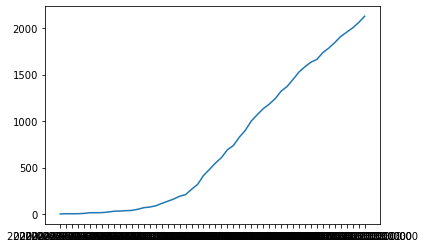

In [16]:
plt.plot(oregon_data['updated'], oregon_data['positive'])


It's rather difficult to read that x-axis, let's do some quick formatting. 

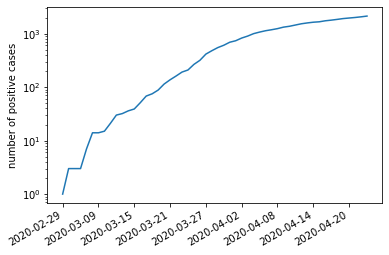

In [117]:
#first let's make a copy of the data that gives the date/time of update
formatted_date =oregon_data['updated'][:].copy()
#next, let's only keep the date, discarding the time, this is just the first
#10 characters of the string
formatted_date = [date.replace(date[10:], '') for date in formatted_date]

fig, ax = plt.subplots()

#to be able to read the labels, we'll use a built-in function to tilt them
fig.autofmt_xdate()

# and then define the number of tick markers to show a more manageable set
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.plot(formatted_date, oregon_data['positive'])

plt.ylabel('number of positive cases')

#change to a log scale
plt.yscale("log")

It's rather easy to just restrict the data range we plot, e.g., let's just pick out data from the "middle" where the number of cases was most rapidly growing (the start of this window roughly corresponds  with the start of social distancing and closing schools).

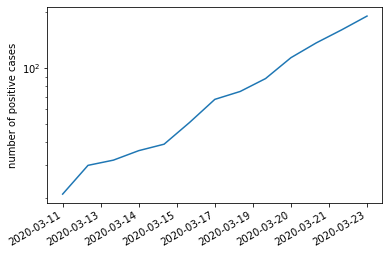

In [118]:
fig, ax = plt.subplots()

#to be able to read the labels, we'll use a built in function to tilt them
fig.autofmt_xdate()
# and then define the number of tick markers to show
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.plot(formatted_date[8:21], oregon_data['positive'][8:21])
plt.ylabel('number of positive cases')

#change to a log scale
plt.yscale("log")

Let us  use the scipy optimize routine to fit this region, so we can see the effect of social distancing and such.

In [22]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [119]:
# Create an array of 'N' points from 0 to 1 corresponding to the number of entires
# This is necessary since the x-axis is dates rather than floats
# I'll note, this data file is missing data for Feb 1 and 2.
# We could go back and fix this, but since we won't actually be fitting
# these points, it's reasonable to ignore them.

xdata = np.linspace(0, 1, len(oregon_data))

#fit the curve, but limit to that middle data above
popt, pcov = curve_fit(func, xdata[8:21], oregon_data['positive'][8:21])

Curve fit doesn't give you an R-squared value by default, so we just need to do a few quick calculations.

In [129]:
residuals = oregon_data['positive'][8:21]- func(xdata[8:21], *popt)
#calculate residual sum of squares
ss_res = np.sum(residuals**2)
#get the total sum of squares
ss_tot = np.sum((oregon_data['positive'][8:21]-np.mean(oregon_data['positive'][8:21]))**2)
#get the r-squared value
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)

0.9967239004550427


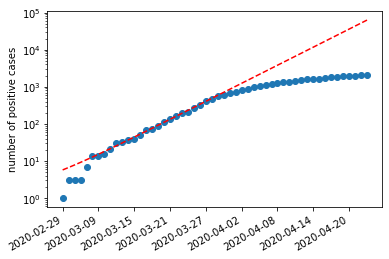

In [130]:
fig, ax = plt.subplots()

#to be able to read the labels, we'll use a built-in function to tilt them
fig.autofmt_xdate()
# and then define the number of tick markers to show
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

#plot all of the data
ax.plot(formatted_date, oregon_data['positive'], marker='o', ls='')

#plot of the fit of the middle region
#to plot the fit, we'll just pass the function we have our x_data points and the fitted a,b,c values
# that are saved in the popt area
ax.plot(formatted_date,  func(xdata, *popt), 'r--')


plt.ylabel('number of positive cases')

#change to a log scale
plt.yscale("log")

Text(0, 0.5, 'actual/predicted postitve cases')

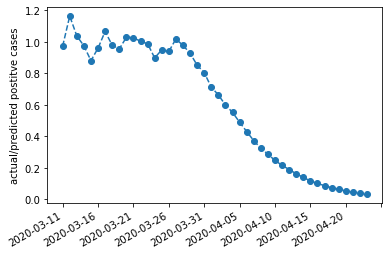

In [131]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
# and then define the number of tick markers to show
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

#plot all of the data
ax.plot(formatted_date[8:],  oregon_data['positive'][8:]/func(xdata[8:], *popt), 'o', ls='--')

plt.ylabel('actual/predicted postitve cases')

Stepping back to where we started, the dictionaries allow us to easily manage our data space and keep track of lots of different pieces of information that can be easily iterated over.

Let's create some totally fictuious data for T and PE for two different runs (data that most likely would be read in from a simulation energy file or the result of analysis by a code and wouldn't be defined by hand).  We will then make a dataframe for each run and then put these in a dictionary.   

In [132]:
run1_data = { 
	'T': [300, 305, 310, 315, 310, 315, 320, 325, 320, 315, 310, 315],
	'PE': [1489, 1523, 1649, 1554, 1634, 1780, 1900, 1843, 1724, 1652, 1400, 1323]
}

run2_data = { 
	'T': [300, 305, 305, 310, 315, 320, 325, 320, 325, 320, 315, 320],
	'PE': [1482, 1512, 1432, 1623, 1723, 1849, 1948, 2200, 2129, 2003, 1802, 1938]
}

r1_pd = pd.DataFrame(run1_data)
r2_pd = pd.DataFrame(run2_data)


sim_data_dict = {'run1': r1_pd,  'run2': r2_pd}


By using a dictionary we can again, hone in on specific pieces of information, like e.g., only run2

In [133]:
sim_data_dict['run2']

,T,PE
0,300,1482
1,305,1512
2,305,1432
3,310,1623
4,315,1723
5,320,1849
6,325,1948
7,320,2200
8,325,2129
9,320,2003


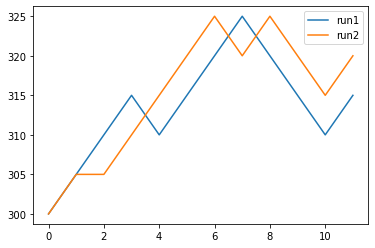

In [134]:
for sim in sim_data_dict:
    plt.plot(sim_data_dict[sim]['T'], label=sim)
plt.legend()

This is of course not the only way to define a dataspace.  This just happens to be a way I personally like.  

E.g., instead of having a dictionary be the top level container, we could put the run1_data and run2_data dictionaries into a dictionary, then convert that to a pandas dataframe. 

In [74]:
sim_data_dict2 = {'run1': run1_data,  'run2': run2_data}

sim_df = pd.DataFrame(sim_data_dict2)

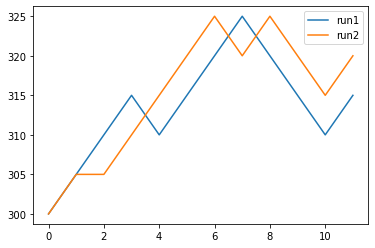

In [135]:
for sim in sim_df:
    plt.plot(sim_df[sim]['T'], label=sim)
    plt.legend()
    

There are some built in functions that make things easy to get information quickly out.

In [160]:
print(sim_data_dict['run1']['T'].mean(), '+/-', sim_data_dict['run1']['T'].std())

313.3333333333333 +/- 6.853444168423418


We can easily export to a numpy array as well.  A quick note, pandas uses the Bessel's correction in the standard deviation formulat. That is N-1, rather than N.  So this will give a slightly different value than numpy.std(). 

In [165]:
T_array = sim_data_dict['run1']['T'].to_numpy()
print(T_array)

[300 305 310 315 310 315 320 325 320 315 310 315]


In [166]:
print(T_array.mean(), '+/-', T_array.std())

313.3333333333333 +/- 6.5616732283431745
